# CDIA20 | Projeto final de disciplina

## Questão dirigida

A COVID-19 tem maior incidência letal que SARS-CoV-1, EBOLA e H1N1?


## Desenvolvimento do projeto

### Importação de bibliotecas

In [1]:
# Download das páginas utilizadas para raspagem
import requests

# Responsável por nos mostrar o conteúdo HTML
from bs4 import BeautifulSoup

# Responsável por ler o arquivo .csv e nos fornecer determinados tipos de análise
import pandas as pd

# Expressões regulares necessárias para tratamento dos dados
import re

# Biblioteca que compreende a construção de gráficos
import matplotlib.pyplot as plt

### Raspagem de dados das epidemias

#### Dados do EBOLA

In [2]:
# URL detentora dos dados de EBOLA
local = 'https://github.com/imdevskp/ebola_outbreak_dataset/blob/master/ebola_2014_2016_clean.csv'

# A biblioteca requests realiza o download
html_pagina = requests.get(local)

In [3]:
# soup nos disponiliza a obtenção do conteúdo HTML
soup = BeautifulSoup(html_pagina.content, 'html.parser')

In [4]:
# Com a inspeção dos elementos da página, a classe que contém a tabela é encontrada pelo soup
tabela = soup.find_all(class_='js-csv-data csv-data js-file-line-container')

# O comprimento da lista nos confirma que há só um elemento, ou seja, a tabela preterida deve ter sido corretamente fornecida
len(tabela)

1

In [5]:
# Como há uma lista, precisamos confirmar qual elemento será usado. Neste caso, como só há um, utilizaremos o elemento [0]
tabela = tabela[0]

In [6]:
# Procurando as tags 'tr' na tabela, achamos cada linha da tabela
linhas = tabela.find_all('tr')

# O comprimento de 2485 nos confirma o sucesso
len(linhas)

2485

##### *Tratamento dos dados*


Analisaremos uma linha qualquer para manipular estes dados de maneira que a análise seja corretamente aplicada. O método ``.text`` nos trará somente o texto do código e ```.strip('\n')``` removerá caracteres indesejados das pontas da string. ``.replace('\n', '\t')`` substituirá caracteres de ENTER por caracteres de tabulação

In [7]:
linha = linhas[7].text.strip('\n')
linha = linha.replace('\n', '\t')
linha


'Nigeria\t2014-09-05\t18.0\t7.0'

In [8]:
type(linha)

str

##### *Definição da função de preparação de linhas*

Utilizaremos a função ``prep_linha(linha)``. Note que os metódos aplicados ao tratamento, acima, serão aplicados na função e a variável linha será retornada.

In [9]:

def prep_linha(linha):
    linha = linha.get_text()
    linha = linha.strip('\n')
    linha = linha.replace('\n', '\t')
    return linha

***Construção do dataset***

Perceba que o *dataset* será construído por tabulações, nos trazendo strings alinhadas, mas ainda não manipuláveis.
Esta tabela será armazenada na variável ``tabela_final``, na qual adicionamos os nomes das colunas desejadas, com tabulações, e um caractere de ENTER ao final.

Usaremos a estrutura de repetição ``for``, de ``1``(a primeira linha) até ``len(linhas)-1``(que indica que serão extraídas todas as linhas, com exceção da última, que não nos é útil nesta análise) 

Cada linha será executada em função de ``prep_linha(linhas[i])``, uma vez que a variável ``linhas`` compreende a lista com todas as linhas.

Com os somatórios ``tabela_final += linha`` e ``tabela_final += '\n'``, a tabela será construída com cada linha da tabela original já preparada e com caracteres que pulem linhas, para a visualização ser perfeita.

In [10]:
tabela_final = 'País ou região\tData\tTotal de casos\tTotal de mortes\n'
for i in range(1,len(linhas)-1):
    linha = prep_linha(linhas[i])
    tabela_final += linha
    tabela_final += '\n'

***Gravação do dataset como arquivo .csv***

In [11]:
arquivo = open('Lista Ebola.csv', 'w')
arquivo.write(tabela_final)
arquivo.close()

##### *Abertura do dataset com pandas*

A biblioteca *pandas* nos traz o *dataset* gravado no formato de *DataFrame*, possibilitando análises estatísticas. Note que é crucial indicar o separador de cada coluna: ``sep = '\t\`` .

 ``.head()`` executará apenas as cinco primeiras linhas do *DataFrame*

In [12]:
ebola_df = pd.read_csv('Lista Ebola.csv', sep = '\t')
ebola_df.head()

,País ou região,Data,Total de casos,Total de mortes
0,Guinea,2014-08-29,482.0,287.0
1,Nigeria,2014-08-29,15.0,6.0
2,Sierra Leone,2014-08-29,935.0,380.0
3,Liberia,2014-08-29,322.0,225.0
4,Guinea,2014-09-05,604.0,362.0


#### Dados da H1N1

In [13]:
# URL detentora dos dados de H1N1
local_h1n1 = "https://en.wikipedia.org/wiki/2009_swine_flu_pandemic_by_country"

# A biblioteca requests realiza o download
html_h1n1 = requests.get(local_h1n1)

In [14]:
# soup_h1n1 nos disponiliza a obtenção do conteúdo HTML
soup_h1n1 =  BeautifulSoup(html_h1n1.content, 'html.parser')

In [15]:
# Com a inspeção dos elementos da página, a classe que contém a tabela é encontrada pelo soup_h1n1
tabela_h1n1 = soup_h1n1.find_all(class_="navbox")

# O comprimento da lista nos traz 3, já que há três tabelas na página com esta identificação.
len(tabela_h1n1)

3

In [16]:
# Analisando os três elementos através da inspeção, vemos que a primeira tabela demonstrada é a que utilizaremos
tabela_h1n1 = tabela_h1n1[0]

In [17]:
# Procurando as tags 'tr' na tabela, achamos cada linha da tabela
linhas_h1n1 = tabela_h1n1.find_all('tr')

# O comprimento de 223 nos confirma o sucesso
len(linhas_h1n1)

223

##### *Definição da função de preparação de linhas*

Utilizaremos a função ``prep_linha_h1n1(linha_h1n1)``. Note que usaremos códigos de substituição, essenciais para o tratamentos dos dados

Neste caso, foram aplicados os métodos de remoção de extremidades comuns: ``.strip()`` e de substituição: ``.replace()``

Ao final, retorna-se a variável ``linha_h1n1``

In [18]:
def prep_linha_h1n1(linha_h1n1):
    linha_h1n1 = linha_h1n1.get_text()
    linha_h1n1 = linha_h1n1.strip('\n')
    linha_h1n1 = linha_h1n1.replace('\n', '\t')
    linha_h1n1 = linha_h1n1.replace(',', '')
    linha_h1n1 = linha_h1n1.replace('(', '').replace(')', '')
    linha_h1n1 = linha_h1n1.replace('\tR', '').replace('\tW', '').replace('\tS', '').replace('\tL', '').replace('\tN', '')
    linha_h1n1 = linha_h1n1.replace('\t***', '').replace('\t**', '').replace('\t*', '')
    linha_h1n1 = linha_h1n1.replace('\tlow2','').replace('\tlow', '').replace('\tmod','')
    linha_h1n1 = linha_h1n1.replace('\t=','').replace('\t-','').replace('\t+', "")
    linha_h1n1 = linha_h1n1.replace('~','').replace('^','').replace('#','').replace('+','')
    linha_h1n1 = linha_h1n1.replace('\t'*8, '\t').replace('\t'*7, '\t').replace('\t'*6, '\t').replace('\t'*5,'\t').replace('\t'*4, '\t').replace('\t'*3,'\t').replace('\t'*2, '\t')
    linha_h1n1 = re.sub(r'\[...\]', '', linha_h1n1)
    linha_h1n1 = re.sub(r'\[..\]', '', linha_h1n1)
    linha_h1n1 = re.sub(r'\[.\]', '', linha_h1n1)
    linha_h1n1 = linha_h1n1.replace('\t\t', '\t')

    return linha_h1n1
prep_linha_h1n1(linhas_h1n1[61])

'Bulgaria\t766\t40'

##### *Construção do dataset*

Perceba que o dataset será construído por tabulações, nos trazendo strings alinhadas, mas ainda não manipuláveis. Esta tabela será armazenada na variável ``tabela_final_h1n1``, na qual adicionamos os nomes das colunas desejadas, com tabulações, e um caractere de ENTER ao final.

Usaremos a estrutura de repetição ``for``, de ``4``(a primeira linha desejável) até ``62``(última linha desejável)

Cada linha será executada em função de ``prep_linha_h1n1(linhas_h1n1[i])``, uma vez que a variável ``linhas_h1n1`` compreende a lista com todas as linhas.

Com os somatórios ``tabela_final_h1n1 += linha`` e ``tabela_final_h1n1 += '\n'``, a tabela será construída com cada linha da tabela original já preparada e com caracteres que pulem linhas, para a visualização ser perfeita.

In [19]:
tabela_final_h1n1 = 'País ou região\tCasos\tMortes\n'
for i in range(4,62):
    linha_h1n1 = prep_linha_h1n1(linhas_h1n1[i])
    tabela_final_h1n1 += linha_h1n1
    tabela_final_h1n1 += '\n'

##### *Gravação do dataset como arquivo .csv*

In [20]:
arquivo_h1n1 = open('Lista H1N1.csv', 'w')
arquivo_h1n1.write(tabela_final_h1n1)
arquivo_h1n1.close()

##### *Abertura do dataset com pandas*

A biblioteca *pandas* nos traz o *dataset* gravado no formato de *DataFrame*, possibilitando análises estatísticas. Note que é crucial indicar o separador de cada coluna: ``sep = '\t\`` 

``.head()`` executará apenas as cinco primeiras linhas do *DataFrame*

In [21]:
h1n1_df = pd.read_csv('Lista H1N1.csv', sep = '\t')
h1n1_df.head()

,País ou região,Casos,Mortes
0,United States,113690,3433
1,Brazil,58178,2135
2,India,33783,2024
3,Mexico,70715,1316
4,China mainland,120940,800


Dados da SARS

In [22]:
# URL detentora dos dados de SARS
local_sars = 'https://en.wikipedia.org/wiki/2002%E2%80%932004_SARS_outbreak'

# A biblioteca requests realiza o download
html_sars = requests.get(local_sars)

In [23]:
# soup_sars nos disponiliza a obtenção do conteúdo HTML
soup_sars = BeautifulSoup(html_sars.content, 'html.parser')

In [24]:
# Com a inspeção dos elementos da página, a classe que contém a tabela é encontrada pelo soup_sars
tabela_sars = soup_sars.find_all(class_="wikitable sortable")

# O comprimento da lista nos confirma que há só um elemento, ou seja, a tabela preterida deve ter sido corretamente fornecida
len(tabela_sars)

1

In [25]:
# Como há uma lista, precisamos confirmar qual elemento será usado. Neste caso, como só há um, utilizaremos o elemento [0]
tabela_sars = tabela_sars[0]

In [26]:
# Procurando as tags 'tr' na tabela, achamos cada linha da tabela
linhas_sars = tabela_sars.find_all('tr')

# O comprimento de 35 nos confirma o sucesso
len(linhas_sars)

35

##### *Tratamento dos dados*

Analisaremos uma linha qualquer para manipular estes dados de maneira que a análise seja corretamente aplicada.

O método ``.text`` nos trará somente o texto do código.

``.strip('\n')`` e ``.strip('\xa0')`` removerão caracteres indesejados das pontas da string.

``.replace('\n', '\t')`` substituirá caracteres de ENTER por caracteres de tabulação.

``re.sub(r'\[.*\]', '')`` removerá, a partir da expressão regular, a notas entre colchetes, indesejadas.

In [27]:
lin = linhas_sars[1].text
lin = lin.strip('\n').strip('\xa0')
lin = lin.replace('\n', '\t')
lin = re.sub(r'\[.*\]', '', lin)
lin = lin.replace(',', '')
lin

'Mainland China\t5327\t349\t6.6'

##### *Definição da função de preparação de linhas*

Utilizaremos a função ``prep_linha_sars(linha_sars)``. Note que usaremos códigos de substituição, essenciais para o tratamentos dos dados


Neste caso, foram aplicados os métodos de remoção de extremidades comuns: ``.strip()``, de substituição de caracteres específicos: ``.replace()`` e de substituição de expressões regulares: ``re.sub()``

Ao final, retorna-se a variável ``linha_sars``

In [28]:
def prep_linha_sars(linha_sars):
    linha_sars = linha_sars.text
    linha_sars = linha_sars.strip('\n').strip('\xa0')
    linha_sars = linha_sars.replace('\n', '\t')
    linha_sars = re.sub(r'\[.*\]', '', linha_sars)
    linha_sars = linha_sars.replace(',', '')
    return linha_sars
prep_linha_sars(linhas_sars[3])

'Taiwan\t346\t73\t21.1'

##### *Construção do dataset*

Perceba que o *dataset* será construído por tabulações, nos trazendo strings alinhadas, mas ainda não manipuláveis.
Esta tabela será armazenada na variável ``tabela_final_sars``, na qual adicionamos os nomes das colunas desejadas, com tabulações, e um caractere de ENTER ao final.

Usaremos a estrutura de repetição ``for``, de ``1``(a primeira linha) até ``len(linhas)-3``(que indica que serão extraídas todas as linhas, com exceção das três últimas, que não nos são úteis nesta análise) 

Cada linha será executada em função de ``prep_linha_sars(linhas_sars[i])``, uma vez que a variável ``linhas_sars`` compreende a lista com todas as linhas.

Com os somatórios ``tabela_final_sars += linha`` e ``tabela_final_sars += '\n'``, a tabela será construída com cada linha da tabela original já preparada e com caracteres que pulem linhas, para a visualização ser perfeita.

In [29]:
tabela_final_sars = 'País\tCasos\tMortes\tCurados\n'
for i in range(1,len(linhas_sars)-3):
    linha_sars = prep_linha_sars(linhas_sars[i])
    tabela_final_sars += linha_sars
    tabela_final_sars += '\n'

##### *Gravação do dataset como arquivo .csv*

In [30]:
arquivo_sars = open('Lista SARS.csv', 'w')
arquivo_sars.write(tabela_final_sars)
arquivo_sars.close()

##### *Abertura do dataset com pandas*

A biblioteca pandas nos traz o *dataset* gravado no formato de *DataFrame*, possibilitando análises estatísticas. Note que é crucial indicar o separador de cada coluna: ``sep = '\t\`` 

``.head()`` executará apenas as cinco primeiras linhas do *DataFrame*

In [31]:
sars_df = pd.read_csv('Lista SARS.csv', '\t')
sars_df = sars_df.drop(columns=['Curados'])
sars_df.head()

,País,Casos,Mortes
0,Mainland China,5327,349
1,Hong Kong,1755,299
2,Taiwan,346,73
3,Canada,251,44
4,Singapore,238,33


Dados de COVID-19

In [32]:
# URL detentora dos dados de COVID-19
local_covid = 'https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv'

# A biblioteca requests realiza o download
html_covid = requests.get(local_covid)

In [33]:
# soup_covid nos disponiliza a obtenção do conteúdo HTML
soup =  BeautifulSoup(html_covid.content, 'html.parser')

In [34]:
# Com a inspeção dos elementos da página, a classe que contém a tabela é encontrada pelo soup
tabela_covid = soup.find_all(class_='highlight tab-size js-file-line-container')

# O comprimento da lista nos confirma que há só um elemento, ou seja, a tabela preterida deve ter sido corretamente fornecida
len(tabela_covid)

1

In [35]:
# Como há uma lista, precisamos confirmar qual elemento será usado. Neste caso, como só há um, utilizaremos o elemento [0]
tabela_covid = tabela_covid[0]

In [36]:
# Procurando as tags 'tr' na tabela, achamos cada linha da tabela
linhas = tabela_covid.find_all('tr')

# O comprimento de 25381 nos confirma o sucesso
len(linhas)

26133

***Tratamento dos dados***

Analisaremos uma linha qualquer para manipular estes dados de maneira que a análise seja corretamente aplicada. O método ``.text`` nos trará somente o texto do código e ```.strip('\n')``` removerá caracteres indesejados das pontas da string. ``.replace('\n', '\t')`` substituirá caracteres de ENTER por caracteres de tabulação

In [37]:
linha = linhas[6].text.strip('\n')
linha = linha.replace('\n', '\t')
linha

'2020-01-22,Antigua and Barbuda,0,0,0\r'

***Definição da preparação de linhas***

Utilizaremos a função ``prep_linha(linha)``. Note que os metódos aplicados ao tratamento, acima, serão aplicados na função e a variável linha será retornada.

In [38]:
def prep_linha(linha):
    linha = linha.get_text()
    linha = linha.strip('\n')
    linha = linha.replace('\n', '\t')
    return linha

***Construção do dataset***

Perceba que o *dataset* será construído por tabulações, nos trazendo strings alinhadas, mas ainda não manipuláveis.
Esta tabela será armazenada na variável ``tabela_final``, na qual adicionamos os nomes das colunas desejadas, com tabulações, e um caractere de ENTER ao final.

Usaremos a estrutura de repetição for a partir da primeira linha que indica que serão extraídas todas as linhas

Cada linha será executada em função de ``prep_linha(linhas[i])``, uma vez que a variável ``linhas`` compreende a lista com todas as linhas.

Com os somatórios tabela_final += linha e tabela_final += '\n', a tabela será construída com cada linha da tabela original já preparada e com caracteres que pulem linhas, para a visualização ser perfeita.

In [39]:
tabela_final = 'Data,País,Confirmados,Recuperados,Mortos\n'
for i in range(1,len(linhas)):
    linha = prep_linha(linhas[i])
    tabela_final += linha
    tabela_final += '\n'

***Gravação do dataset como arquivo .csv***

In [40]:
arquivo = open('lista-covid.csv', 'w')
arquivo.write(tabela_final)
arquivo.close()

***Abertura do dataset com pandas***

A biblioteca pandas nos traz o dataset gravado no formato de DataFrame, possibilitando análises estatísticas. Note que é crucial indicar o separador de cada coluna: sep = ','

In [41]:
covid_df = pd.read_csv('lista-covid.csv', sep = ',')
covid_df.head()

,Data,País,Confirmados,Recuperados,Mortos
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


### Análises estatísticas

#### Total de casos, mortes e letalidade

Será produzida uma tabela que contenha o total de cada um desses fatores relativo à cada pandemia, para que possamos analisar, de maneira proporcional, o quanto cada epidemia afetou o mundo e quão letal ela foi para com os pacientes.

*Ebola*

In [42]:
# Localizando os dados do último dia em que foram coletados
ebola_final = ebola_df.loc[ebola_df['Data'] == '2016-03-23']

# Somando os totais de casos e mortes e criando uma variável para armazená-los
totalcasos_ebola = int(ebola_final['Total de casos'].sum())
totalmortes_ebola = int(ebola_final['Total de mortes'].sum())

# Dividindo mortes por casos, para retornar a letalidade e armazenando-a também em uma variável
letalidade_ebola = float(totalmortes_ebola/totalcasos_ebola)

*H1N1*

In [43]:
# Somando os totais de casos e mortes e criando uma variável para armazená-los
totalcasos_h1n1 = h1n1_df['Casos'].sum()
totalmortes_h1n1 = h1n1_df['Mortes'].sum()

# Dividindo mortes por casos, para retornar a letalidade e armazenando-a também em uma variável
letalidade_h1n1 = float(totalmortes_h1n1/totalcasos_h1n1)

*SARS-CoV-1*

In [44]:
# Somando os totais de casos e mortes e criando uma variável para armazená-los
totalcasos_sars = sars_df['Casos'].sum()
totalmortes_sars = sars_df['Mortes'].sum()

# Dividindo mortes por casos, para retornar a letalidade e armazenando-a também em uma variável
letalidade_sars = float(totalmortes_sars/totalcasos_sars)

*COVID-19*

In [45]:
# Localizando os dados do último dia em que foram coletados
covid_final = covid_df.loc[covid_df['Data'] == '2020-06-07']

# Somando os totais de casos e mortes e criando uma variável para armazená-los
totalcasos_covid = covid_final['Confirmados'].sum()
totalmortes_covid = covid_final['Mortos'].sum()

# Dividindo mortes por casos, para retornar a letalidade e armazenando-a também em uma variável
letalidade_covid = float(totalmortes_covid/totalcasos_covid)

*Criando os DataFrames*

In [46]:
tabela_epidemias = pd.DataFrame({
    'Epidemia': ['COVID-19', 'H1N1', 'Ebola', 'SARS-Cov-1'],
    'Total de casos': [totalcasos_covid, totalcasos_h1n1, totalcasos_ebola, totalcasos_sars],
    'Total de mortes': [totalmortes_covid, totalmortes_h1n1, totalmortes_ebola, totalmortes_sars],
    'Letalidade': [letalidade_covid, letalidade_h1n1, letalidade_ebola, letalidade_sars]
})
    
tabela_epidemias

,Epidemia,Total de casos,Total de mortes,Letalidade
0,COVID-19,7010349,402724,0.057447
1,H1N1,6331011,18730,0.002958
2,Ebola,15247,5683,0.372729
3,SARS-Cov-1,8100,811,0.100123


In [47]:
# Esta tabela incluirá somente a letalidade das epidemias
tabela_letalidade = pd.DataFrame({
    'Epidemia': ['COVID-19', 'H1N1', 'Ebola', 'SARS-Cov-1'],
    'Letalidade': [letalidade_covid, letalidade_h1n1, letalidade_ebola, letalidade_sars]
})
    
tabela_letalidade

,Epidemia,Letalidade
0,COVID-19,0.057447
1,H1N1,0.002958
2,Ebola,0.372729
3,SARS-Cov-1,0.100123


*Construção de gráficos*

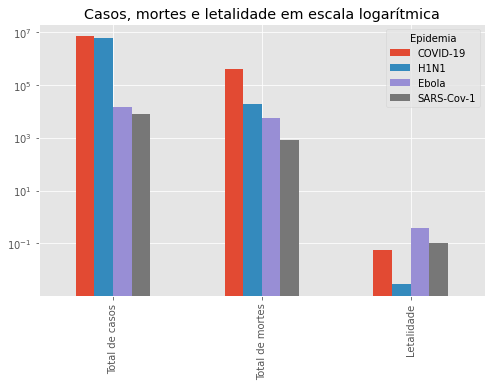

In [48]:
# Estilo do gráfico
plt.style.use('ggplot')
# Tamanho do gráfico
plt.rcParams['figure.figsize'] = (8,5)

# Utilizamos .set_index() para inverter linha e coluna do DataFrame original
# Utilizamos .plot() para que plt encontre os valores e os coloque em gráfico
# kind = 'bar' traz um gráfico de barras
# logy = True coloca o eixo y em escala logarítmica
# title = <input> aplica o título ao gráfico
tabela_epidemias.set_index('Epidemia').T.plot(kind = 'bar', logy = True, title = 'Casos, mortes e letalidade em escala logarítmica')

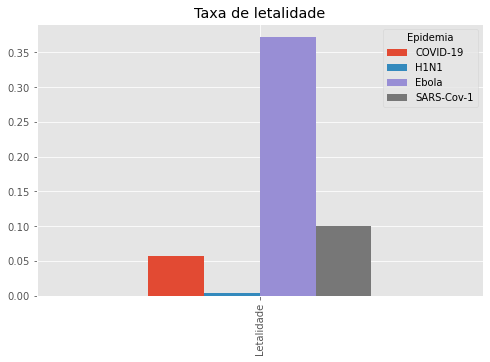

In [49]:
# Estilo do gráfico
plt.style.use('ggplot')
# Tamanho do gráfico
plt.rcParams['figure.figsize'] = (8,5)

# Utilizamos .set_index() para inverter linha e coluna do DataFrame original
# Utilizamos .plot() para que plt encontre os valores e os coloque em gráfico
# kind = 'bar' traz um gráfico de barras
# logy = True coloca o eixo y em escala logarítmica
# title = <input> aplica o título ao gráfico
tabela_letalidade.set_index('Epidemia').T.plot(kind = 'bar', title = 'Taxa de letalidade')

#### Países mais afetados pelas epidemias

Serão produzidos gráficos que ilustram os países com maiores números de mortes por cada epidemia, para que possamos estabelecer se tal doença afetou o planeta como um todo, um continente, uma região etc.

*EBOLA*

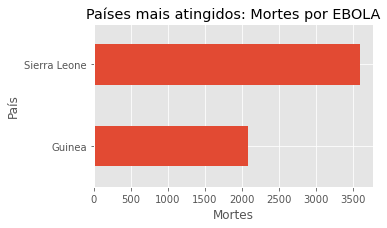

In [50]:
# Tamanho do gráfico
plt.rcParams['figure.figsize'] = (5,3)

# Determinando o DataFrame para mostrar apenas os dados do último dia de coleta
ebola_mortes = ebola_df.loc[ebola_df['Data'] == '2016-03-23']
# Removendo colunas desnecessárias para esta análise
ebola_mortes = ebola_mortes.drop('Data', inplace = False, axis = 1)
ebola_mortes = ebola_mortes.drop('Total de casos', inplace = False, axis = 1)
# Filtrando o DataFrame com a condição de haver mais de 1000 mortes
ebola_mortes = ebola_mortes.loc[ebola_mortes['Total de mortes'] >= 1000]
# Ordenando para que mostre de maneira crescente o total de mortes
ebola_mortes = ebola_mortes.sort_values(by = 'Total de mortes')

# Utilizamos .plot() para que plt encontre os valores e os coloque em gráfico
# kind = 'barh' nos traz um gráfico de barras horizontais
# Determinamos quais serão os eixos x e y
# legend = False remove a legenda
# title = <input> determina o título do gráfico
ebola_mortes.plot(kind = 'barh', x = 'País ou região', y = 'Total de mortes', legend = False, title = 'Países mais atingidos: Mortes por EBOLA')

# Determinando os nomes dos eixos
plt.xlabel('Mortes')
plt.ylabel('País')

# Execução do gráfico
plt.show()

*H1N1*

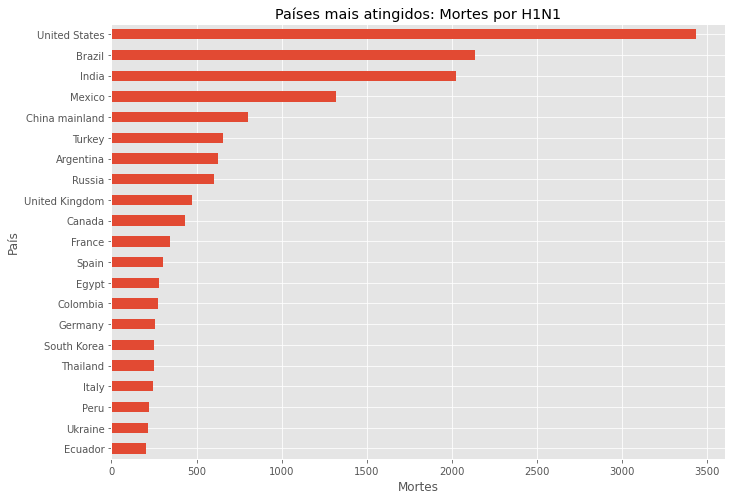

In [51]:
# Tamanho do gráfico
plt.rcParams['figure.figsize'] = (11,8)

# Removendo colunas desnecessárias para esta análise
h1n1_mortes = h1n1_df.drop('Casos', inplace = False, axis = 1)
# Filtrando o DataFrame com a condição de haver mais de 200 mortes
h1n1_mortes = h1n1_mortes.loc[h1n1_mortes['Mortes'] >= 200]
# Ordenando para que mostre de maneira crescente o total de mortes
h1n1_mortes = h1n1_mortes.sort_values(by = 'Mortes')

# Utilizamos .plot() para que plt encontre os valores e os coloque em gráfico
# kind = 'barh' nos traz um gráfico de barras horizontais
# Determinamos quais serão os eixos x e y
# legend = False remove a legenda
# title = <input> determina o título do gráfico
h1n1_mortes.plot(kind = 'barh', legend = False, x = 'País ou região', y = 'Mortes', title = 'Países mais atingidos: Mortes por H1N1')

# Determinando os nomes dos eixos
plt.xlabel('Mortes')
plt.ylabel('País')

# Executando o gráfico
plt.show()

*SARS-CoV-1*

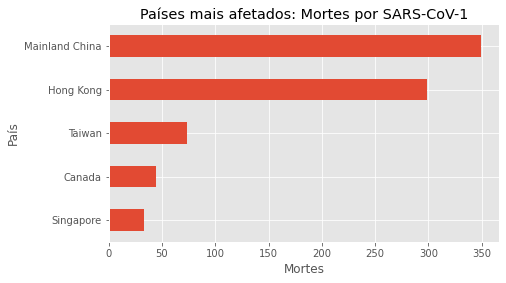

In [52]:
# Tamamho do gráfico
plt.rcParams['figure.figsize'] = (7,4)

# Removendo colunas desnecessárias para esta análise
sars_mortes = sars_df.drop('Casos', inplace = False, axis = 1)
# Filtrando o DataFrame com a condição de haver mais de 20 mortes
sars_mortes = sars_mortes.loc[sars_mortes['Mortes'] >= 20]
# Ordenando para que mostre de maneira crescente o total de mortes
sars_mortes = sars_mortes.sort_values(by = 'Mortes', ascending = True)

# Utilizamos .plot() para que plt encontre os valores e os coloque em gráfico
# kind = 'barh' nos traz um gráfico de barras horizontais
# Determinamos quais serão os eixos x e y
# legend = False remove a legenda
# title = <input> determina o título do gráfico
sars_mortes.plot(kind = 'barh', title = 'Países mais afetados: Mortes por SARS-CoV-1', legend = False, x = 'País', y = 'Mortes')

# Determinando os nomes dos eixos
plt.xlabel('Mortes')
plt.ylabel('País')

# Executando o gráfico
plt.show()

*COVID-19*

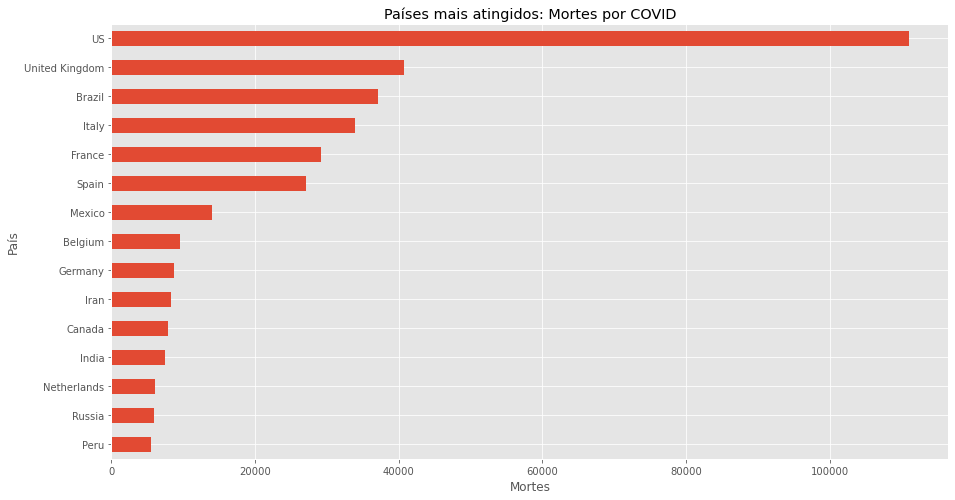

In [53]:
# Tamanho do gráfico
plt.rcParams['figure.figsize'] = (15,8)

# Removendo colunas desnecessárias para esta análise
covid_mortes = covid_df.drop('Confirmados', inplace = False, axis = 1)
covid_mortes = covid_df.drop('Recuperados', inplace = False, axis = 1)
# Filtrando o DataFrame com a condição de haver mais de 200 mortes
covid_mortes = covid_mortes.loc[covid_mortes['Data'] == '2020-06-08']
covid_mortes = covid_mortes.loc[covid_mortes['Mortos'] >= 5000]
# Ordenando para que mostre de maneira crescente o total de mortes
covid_mortes = covid_mortes.sort_values(by = 'Mortos')

# Utilizamos .plot() para que plt encontre os valores e os coloque em gráfico
# kind = 'barh' nos traz um gráfico de barras horizontais
# Determinamos quais serão os eixos x e y
# legend = False remove a legenda
# title = <input> determina o título do gráfico
covid_mortes.plot(kind = 'barh', legend = False, x = 'País', y = 'Mortos', title = 'Países mais atingidos: Mortes por COVID')

# Determinando os nomes dos eixos
plt.xlabel('Mortes')
plt.ylabel('País')

# Executando o gráfico
plt.show()

**MAPAS**

*Visualização em mapa dos países com registro das doenças*

COVID-19

In [54]:
import folium

# Lendo o csv com as Latitudes de Longitudes dos países
csv_latlog_covid = pd.read_csv("../input/mapa-log-lat-covid/LatLog COVID-19.csv")
                           


In [55]:
# Criando o mapa para ser usado 
world_map_covid = folium.Map(location=[-16.1237611, -59.9219642], zoom_start=2, max_zoom = 10, min_zoom = 2)

# Criando repetição para incluir informações no mapa 
for i in range(0,len(csv_latlog_covid)):
    
    # Marcador do mapa
    folium.Marker(
        
        # Atribuindo as latitudes e longitudes de acordo com as colunas do csv
        location=[csv_latlog_covid.iloc[i]['Latitude'], csv_latlog_covid.iloc[i]['Longitude']],
        
        # Adicionando informação do pais ao marker 
        popup = csv_latlog_covid.iloc[i]['Pais'],
        
        #Atribuindo tìtulo ao marker
        title = 'País com caso de COVID-19',
        
         #Definido cor do marcador 
        icon = folium.Icon(color='red')
        
    # Tudo isso adicionado ao mapa
    ).add_to(world_map_covid)
    
world_map_covid

EBOLA

In [56]:
csv_latlog_ebola = pd.read_csv('../input/mapa-log-lat-ebola/LatLog Ebola.csv')




In [57]:
world_map_ebola = folium.Map(location=[14.497401, -14.452362], zoom_start=2, max_zoom = 10, min_zoom = 2)

for i in range(0,len(csv_latlog_ebola)):
    folium.Marker(
        location=[csv_latlog_ebola.iloc[i]['Latitude'], csv_latlog_ebola.iloc[i]['Longitude']],
        popup = csv_latlog_ebola.iloc[i]['Pais'],
        title = 'Pais com casos de Ebola',
        icon = folium.Icon(color='green')
        
    ).add_to(world_map_ebola)
    
world_map_ebola

SARS

In [58]:
csv_latlog_sars = pd.read_csv('../input/mapa-log-lat-sars/LatLog SARS.csv')

In [59]:
world_map_sars = folium.Map(location=[35.86166, 104.195397], zoom_start=2, max_zoom = 10, min_zoom = 2)

for i in range(0,len(csv_latlog_sars)):
    folium.Marker(
        location=[csv_latlog_sars.iloc[i]['Latitude'], csv_latlog_sars.iloc[i]['Longitude']],
        popup = csv_latlog_sars.iloc[i]['Pais'],
        title = 'Pais com casos de SARS',
        icon = folium.Icon(color='blue')
        
    ).add_to(world_map_sars)
    
world_map_sars

H1N1

In [60]:
csv_latlog_h1n1 = pd.read_csv('../input/maploglath1n1/LatLog H1N1.csv')

In [61]:
world_map_h1n1 = folium.Map(location=[14.497401, -14.452362], zoom_start=2, max_zoom = 10, min_zoom = 2)

for i in range(0,len(csv_latlog_h1n1)):
    folium.Marker(
        location=[csv_latlog_h1n1.iloc[i]['Latitude'], csv_latlog_h1n1.iloc[i]['Longitude']],
        popup = csv_latlog_h1n1.iloc[i]['Pais'],
        title = 'Pais com casos de H1N1',
        icon = folium.Icon(color='purple')
        
    ).add_to(world_map_h1n1)
    
world_map_h1n1

### Conclusão

A COVID-19, com 5,7% de letalidade sobre os casos confirmados sintomaticamente até então, não é tão letal quanto EBOLA, que apresentou 37,2% de taxa e SARS-CoV-1, com 10%. No entanto, estas duas supracitadas não possuem a mesma capacidade de contágio, o que é notório pela quantidade de casos confirmados: EBOLA e SARS-CoV-1 não chegaram à casa das centenas de milhares, enquanto a COVID-19, ainda em andamento, já conta com mais de 7 milhões de pacientes confirmados. E o que a diferencia da pandemia de H1N1, com mais de 6 milhões de indíviduos que contraíram a doença? A letalidade cinco vezes maior: H1N1 possuiu uma incidência letal de aproximadamente 0,3%. Ademais, é importante ressaltar os países mais afetados: COVID-19 e H1N1 tornaram-se pandemias, evidente nos gráficos acima: países de diversos continentes presentes, enquanto as epidemias de EBOLA e SARS-CoV-1 permaneceram fortes no continente africano e asiático, respectivamente, sem grande contágio ao redor do mundo.